# Analyzing Data with Pandas and Visualizing Results with Matplotlib

This notebook demonstrates how to load, explore, analyze, and visualize a dataset using pandas, matplotlib, and seaborn. We use the Iris dataset as an example.

## 1. Import Required Libraries
Import pandas, matplotlib, seaborn, and other necessary libraries for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## 2. Load the Dataset with Error Handling
We will use the Iris dataset from sklearn. If you want to use your own CSV, update the code below.

In [2]:
# Try to load a CSV, else use sklearn's iris dataset
df = None
try:
    # Uncomment and set your CSV path if you want to use your own file
    # df = pd.read_csv('your_dataset.csv')
    # print('Loaded custom CSV dataset.')
    raise FileNotFoundError  # Force using iris for this example
except Exception as e:
    print('Loading Iris dataset from sklearn...')
    iris = load_iris(as_frame=True)
    df = iris.frame
    df['species'] = iris.target.apply(lambda x: iris.target_names[x])
    print('Iris dataset loaded.')
df.head()

Loading Iris dataset from sklearn...
Iris dataset loaded.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 3. Inspect and Explore the Dataset
Display the first few rows, check data types, and look for missing values.

In [3]:
# Display first 5 rows
print('First 5 rows:')
display(df.head())

# Data types
print('Data types:')
display(df.dtypes)

# Missing values
print('Missing values:')
display(df.isnull().sum())

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Data types:


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
species               object
dtype: object

Missing values:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

## 4. Clean the Dataset
Handle missing values and ensure data types are appropriate for analysis.

In [4]:
# For Iris, there are no missing values, but here's how you would handle them:
if df.isnull().sum().sum() > 0:
    df = df.fillna(df.mean(numeric_only=True))
    print('Filled missing values with column means.')
else:
    print('No missing values to clean.')
# Ensure correct data types
display(df.dtypes)

No missing values to clean.



sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
species               object
dtype: object

## 5. Compute Basic Statistics
Use .describe() to compute mean, median, standard deviation, and other statistics for numerical columns.

In [5]:
# Basic statistics
describe = df.describe()
print('Basic statistics:')
display(describe)

# Median for each numerical column
print('Median values:')
display(df.median(numeric_only=True))

Basic statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Median values:


sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
target               1.00
dtype: float64

## 6. Group and Analyze Data by Category
Group the data by species and compute the mean of each numerical column. Identify patterns or interesting findings.

In [6]:
# Group by species and compute mean of numerical columns
grouped = df.groupby('species').mean(numeric_only=True)
print('Mean values by species:')
display(grouped)

# Example finding: which species has the largest average petal length?
max_petal_species = grouped['petal length (cm)'].idxmax()
print(f"Species with largest average petal length: {max_petal_species}")

Mean values by species:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


Species with largest average petal length: virginica


## 7. Line Chart: Trends Over Time
For the Iris dataset, we can simulate a time series by plotting the sepal length across the sample index.

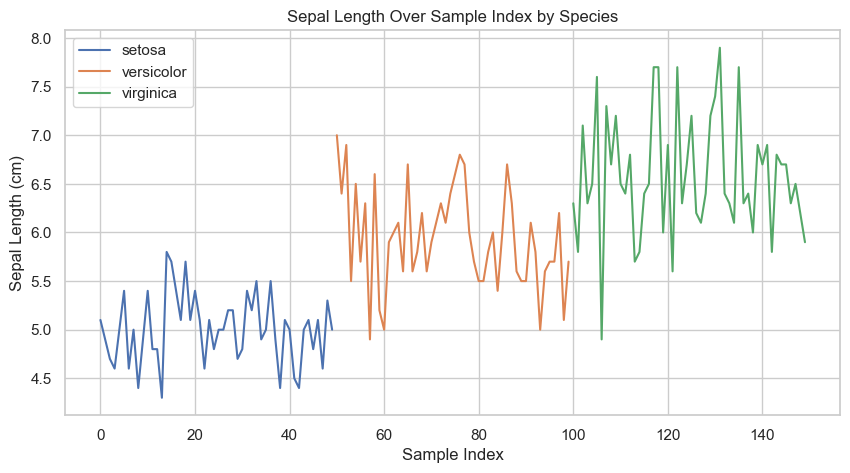

In [7]:
plt.figure(figsize=(10,5))
for species in df['species'].unique():
    plt.plot(df[df['species'] == species].index, df[df['species'] == species]['sepal length (cm)'], label=species)
plt.title('Sepal Length Over Sample Index by Species')
plt.xlabel('Sample Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.show()

## 8. Bar Chart: Comparison Across Categories
Compare the average petal length for each species using a bar chart.

/tmp/ipykernel_70601/4021400844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped['petal length (cm)'], palette='viridis')


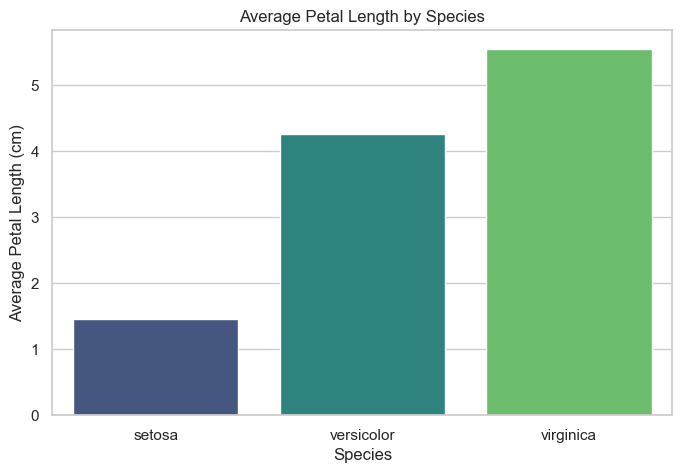

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x=grouped.index, y=grouped['petal length (cm)'], palette='viridis')
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.show()

## 9. Histogram: Distribution of a Numerical Column
Visualize the distribution of sepal width.

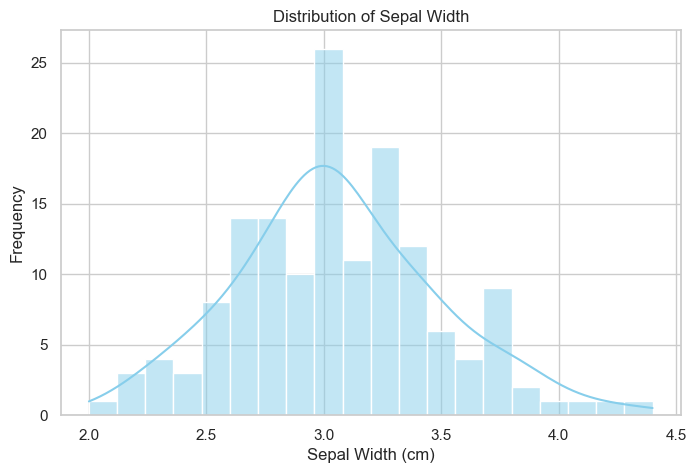

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['sepal width (cm)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

## 10. Scatter Plot: Relationship Between Two Numerical Columns
Visualize the relationship between sepal length and petal length, colored by species.

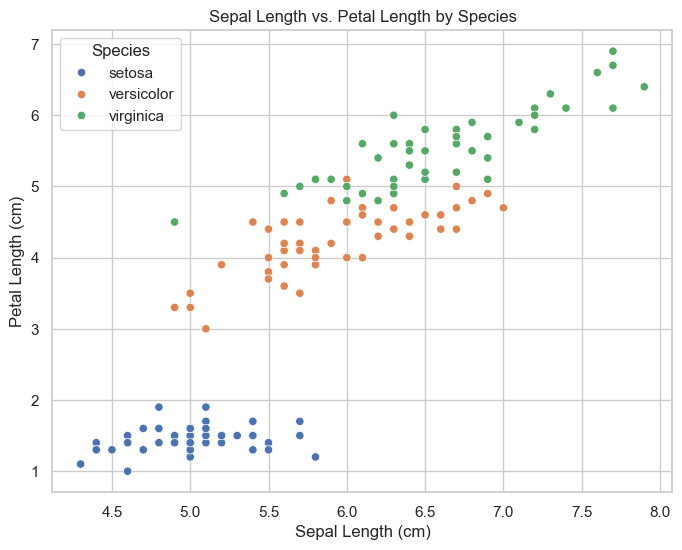

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='deep')
plt.title('Sepal Length vs. Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()

## 11. Observations and Findings
- The Iris dataset is clean and well-structured, with no missing values.
- There are clear differences in petal length and sepal length among the three species.
- The scatter plot shows that petal length and sepal length are positively correlated, especially for versicolor and virginica.
- Setosa species have distinctly smaller petal and sepal sizes compared to the other two species.
- The visualizations help to quickly identify patterns and differences between species.